In [2]:
import os
import pandas as pd
import numpy as np
import re
PUIdata = os.getenv('PUIDATA')

### Load dataset

In [3]:
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

# 1. Define a reserach question

Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available

Check if all Boroughs and Community Districts are represented in the Data 

In [5]:
data0= data[['Community Board','Agency Name','Complaint Type','Descriptor',
             'Borough','Resolution Description','Location']]

In [10]:
data0.head()

,Community Board,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Location
0,13 BROOKLYN,Department of Transportation,Street Condition,Pothole,BROOKLYN,NaN,"(40.57343122248129, -73.99174247588253)"
1,0 Unspecified,CHALL,Opinion for the Mayor,HOUSING,Unspecified,Your comments have been submitted to the Mayor...,NaN
2,18 BROOKLYN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,BROOKLYN,The Department of Parks and Recreation usually...,"(40.62500363580505, -73.92072558378698)"
3,12 BROOKLYN,New York City Police Department,Illegal Parking,Blocked Hydrant,BROOKLYN,Your complaint has been received by the Police...,"(40.634522428879706, -73.97479041437481)"
4,0 Unspecified,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,Unspecified,The Human Resources Administration received yo...,NaN


### How many unique values are there?

In [11]:
len(data0['Community Board'].unique())

77

# 3. Think about possible measurement errors

Why so many? Due to 'unspecified' , 'missing', and 'invalid entries'. Try to remove all the unnecessary if possible...

In [16]:
data1 = data0.drop_duplicates('Location', take_last=True)
data1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  if __name__ == '__main__':


,Community Board,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Location
16,05 MANHATTAN,New York City Police Department,Noise - Commercial,Banging/Pounding,MANHATTAN,The Police Department responded to the complai...,"(40.759548404216886, -73.98546383375366)"
17,14 BROOKLYN,New York City Police Department,Illegal Parking,Blocked Sidewalk,BROOKLYN,Your complaint has been received by the Police...,"(40.632158514338116, -73.97197392871156)"
21,02 QUEENS,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,QUEENS,The Department of Parks and Recreation usually...,"(40.74661655879547, -73.94477184350308)"
51,04 BRONX,New York City Police Department,Illegal Parking,Blocked Sidewalk,BRONX,The Police Department responded to the complai...,"(40.84059460259431, -73.91150938902126)"
83,07 QUEENS,New York City Police Department,Illegal Parking,Blocked Sidewalk,QUEENS,Your complaint has been received by the Police...,"(40.76762699717518, -73.79875040300837)"


In [61]:
data2 = data1[data1['Community Board'] != '0 Unspecified']
data2.head()

,Community Board,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Location
16,05 MANHATTAN,New York City Police Department,Noise - Commercial,Banging/Pounding,MANHATTAN,The Police Department responded to the complai...,"(40.759548404216886, -73.98546383375366)"
17,14 BROOKLYN,New York City Police Department,Illegal Parking,Blocked Sidewalk,BROOKLYN,Your complaint has been received by the Police...,"(40.632158514338116, -73.97197392871156)"
21,02 QUEENS,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,QUEENS,The Department of Parks and Recreation usually...,"(40.74661655879547, -73.94477184350308)"
51,04 BRONX,New York City Police Department,Illegal Parking,Blocked Sidewalk,BRONX,The Police Department responded to the complai...,"(40.84059460259431, -73.91150938902126)"
83,07 QUEENS,New York City Police Department,Illegal Parking,Blocked Sidewalk,QUEENS,Your complaint has been received by the Police...,"(40.76762699717518, -73.79875040300837)"


In [32]:
data3 = data2[data2['Descriptor']!= 'No Access']
data3.head()

,Community Board,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Location
16,05 MANHATTAN,New York City Police Department,Noise - Commercial,Banging/Pounding,MANHATTAN,The Police Department responded to the complai...,"(40.759548404216886, -73.98546383375366)"
17,14 BROOKLYN,New York City Police Department,Illegal Parking,Blocked Sidewalk,BROOKLYN,Your complaint has been received by the Police...,"(40.632158514338116, -73.97197392871156)"
21,02 QUEENS,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,QUEENS,The Department of Parks and Recreation usually...,"(40.74661655879547, -73.94477184350308)"
51,04 BRONX,New York City Police Department,Illegal Parking,Blocked Sidewalk,BRONX,The Police Department responded to the complai...,"(40.84059460259431, -73.91150938902126)"
83,07 QUEENS,New York City Police Department,Illegal Parking,Blocked Sidewalk,QUEENS,Your complaint has been received by the Police...,"(40.76762699717518, -73.79875040300837)"


In [62]:
len(data3['Community Board'].unique())

76

### Why? We were told there should be 59 community districts in this dataset!

In [6]:
# remove those 'unspecified itmes'
data_cd = data0[data0['Community Board'].str.contains('Unspecified') == False]

In [7]:
data_cd['Community Board'].unique()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN', '64 MANHATTAN',
       '81 QUEENS', '55 BROOKLYN', '83

In [8]:
# Commnunity district without 'unspecified'
len(data_cd['Community Board'].unique())

71

### http://www.baruch.cuny.edu/nycdata/population-geography/maps-boroughdistricts.htm indicates that 5 borough in NYC each does not have '00' greater than '20'! Therefore, something like '84 QUEENS' is an invalid entry.

In [9]:
#drop invalid entry
#http://stackoverflow.com/questions/31663426/python-pandas-drop-rows-from-data-frame-on-string-match-from-list
to_drop = ['64 MANHATTAN','55 BROOKLYN','28 BRONX','27 BRONX','95 STATEN ISLAND','84 QUEENS',
           '81 QUEENS','83 QUEENS','80 QUEENS','82 QUEENS','56 BROOKLYN','26 BRONX']

In [10]:
df1 = data_cd[~data_cd['Community Board'].isin(to_drop)]

In [11]:
# Community district without 'invalid entery'
len(df1["Community Board"].unique())

59

In [255]:
# Then take a close look at these "invalid enteries", for example...
datax= data_cd[data_cd["Community Board"] == "26 BRONX"]
datax.head()

,Community Board,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Location
8455,26 BRONX,Department of Transportation,Highway Condition,Dead Animal,BRONX,General maintenance and cleaning is on a regul...,"(40.89461182516538, -73.8825230744972)"
9768,26 BRONX,Department of Transportation,Highway Condition,Dead Animal,BRONX,General maintenance and cleaning is on a regul...,"(40.89461182516538, -73.8825230744972)"
42130,26 BRONX,Department of Transportation,Highway Condition,Cave-in,BRONX,General maintenance and cleaning is on a regul...,"(40.89949137445574, -73.89331926299221)"
106886,26 BRONX,Department of Transportation,Street Condition,Pothole,BRONX,NaN,"(40.89544911516667, -73.88001135535546)"
196581,26 BRONX,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,BRONX,The Police Department responded to the complai...,"(40.891192817571074, -73.89480824637491)"


In [ ]:
# So where were these spots based on 'Location'? What kinds of mistakes might cause such errors?
# In effect, these invalid commuinity districts were supposed to contribute to the complaints numbers on community level

In [261]:
data0.isnull().sum() # orginal community districts dataset 

Community Board                 0
Agency Name                     0
Complaint Type                  0
Descriptor                  31057
Borough                         0
Resolution Description    3786751
Location                   878752
dtype: int64

In [262]:
df1.isnull().sum() # 59 community districts dataset

Community Board                 0
Agency Name                     0
Complaint Type                  0
Descriptor                  30545
Borough                         0
Resolution Description    3021191
Location                    85468
dtype: int64

### The missing vuales were found in 'Descriptor', 'Resolution Description', and 'Location' ( patterns?)

In [ ]:
#Is it possible to replace missing values? 
#Is it possible to use Complaint Type to fill missings in Resolution Descriptor?

In [316]:
df1.head()

,Community Board,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Location
0,13 BROOKLYN,Department of Transportation,Street Condition,Pothole,BROOKLYN,NaN,"(40.57343122248129, -73.99174247588253)"
2,18 BROOKLYN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,BROOKLYN,The Department of Parks and Recreation usually...,"(40.62500363580505, -73.92072558378698)"
3,12 BROOKLYN,New York City Police Department,Illegal Parking,Blocked Hydrant,BROOKLYN,Your complaint has been received by the Police...,"(40.634522428879706, -73.97479041437481)"
5,02 STATEN ISLAND,Department of Transportation,Highway Condition,Pothole - Highway,STATEN ISLAND,The Department of Transportation requires 10 d...,"(40.60687536641399, -74.0854077221027)"
7,08 MANHATTAN,New York City Police Department,Noise - Commercial,Loud Music/Party,MANHATTAN,Your complaint has been forwarded to the New Y...,"(40.769378795761845, -73.95793023233308)"


### Not all of them, but we can replace the missing vuale in 'Resolution Description' with 'Complaint Type'

In [273]:
df0 = df1['Complaint Type'].fillna(df1['Resolution Description'])
df0.head()

0                 Street Condition
2    Root/Sewer/Sidewalk Condition
3                  Illegal Parking
5                Highway Condition
7               Noise - Commercial
Name: Complaint Type, dtype: object

In [21]:
#Generate an indicator which ranks the Community District by complaint numbers
df_com = df1.groupby('Community Board').count()['Complaint Type']
df_com.head()

Community Board
01 BRONX             74631
01 BROOKLYN         185057
01 MANHATTAN         77974
01 QUEENS           171484
01 STATEN ISLAND    182713
Name: Complaint Type, dtype: int64

In [22]:
df_com.sort_values(ascending=0).head()

Community Board
12 MANHATTAN    268053
12 QUEENS       229383
03 BROOKLYN     197306
07 QUEENS       195961
17 BROOKLYN     191720
Name: Complaint Type, dtype: int64

In [200]:
# Safe reduced data frame (Community District level)
df_new1 = pd.DataFrame(df_com.sort_values(ascending=0))
df_new1 = df_com.sort_values(ascending=0).reset_index()
df_new1.columns = ['Community Board','Complaint Number']
df_new1.head()

,Community Board,Complaint Number
0,12 MANHATTAN,268053
1,12 QUEENS,229383
2,03 BROOKLYN,197306
3,07 QUEENS,195961
4,17 BROOKLYN,191720


In [317]:
# Mahattan people win the game!

# 4. Think about the interpretation of your results?

In [42]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [53]:
# Check variables in file
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [45]:
# How many community districts are in file? 
len(df_pop['cd_id'].unique())

59

In [46]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
df_pop.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [186]:
# Save data frame
df_new2 = df_pop[['FIPS','cd_id','Population Density (per sq. mile)']]
df_new2.head()

,FIPS,cd_id,Population Density (per sq. mile)
0,3603701,BX08,31229.95006
1,3603702,BX12,19966.67839
2,3603703,BX10,12913.81703
3,3603704,BX11,35677.95453
4,3603705,BX03,39405.79222


In [49]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [63]:
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [64]:
len(df_infr['Geographic Identifier'].unique())

55

In [57]:
df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [68]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
df_3 = df_infr[['Geographic Identifier','Households: With Mobile Broadband',
                'Households: With Mobile Broadband.1','Households: With Mobile Broadband.2',
                'Households: With Mobile Broadband.3','Households: With Mobile Broadband.4']]
df_3.head()

,Geographic Identifier,Households: With Mobile Broadband,Households: With Mobile Broadband.1,Households: With Mobile Broadband.2,Households: With Mobile Broadband.3,Households: With Mobile Broadband.4
0,79500US3603701,946,10433,433,37,3510
1,79500US3603702,405,5577,2358,0,2146
2,79500US3603703,398,6377,1200,0,3450
3,79500US3603704,474,5624,2272,241,2137
4,79500US3603705,651,6690,695,111,6760


In [188]:
# Aggregate internet type by high and low connections
df_4 = df_infr[['FIPS','Geographic Identifier', 
                'Households: With A Broadband Internet Subscription',
                'Households: Dial-Up Alone',
                'Households: Without An Internet Subscription',
                'Households: No Computer']]
df_5 = pd.DataFrame(df_4)
df_5.head()

,FIPS,Geographic Identifier,Households: With A Broadband Internet Subscription,Households: Dial-Up Alone,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,30943,444,3701,6987
1,3603702,79500US3603702,31435,178,5087,8130
2,3603703,79500US3603703,32333,158,6209,8350
3,3603704,79500US3603704,31278,141,5837,7685
4,3603705,79500US3603705,33408,88,9080,14980


In [189]:
df_5['High Connections'] = df_4['Households: With A Broadband Internet Subscription']
df_5['Low connections'] = df_4['Households: Dial-Up Alone'] + \
                          df_4['Households: Without An Internet Subscription'] + \
                          df_4['Households: No Computer']

In [190]:
df_new3 = df_5[['FIPS','Geographic Identifier', 'High Connections', 'Low connections']]

df_new3.head()

,FIPS,Geographic Identifier,High Connections,Low connections
0,3603701,79500US3603701,30943,11132
1,3603702,79500US3603702,31435,13395
2,3603703,79500US3603703,32333,14717
3,3603704,79500US3603704,31278,13663
4,3603705,79500US3603705,33408,24148


# 5. Inform your results by linking datasets

In [197]:
df_new1.head()

,Community Board,Complaint Number
0,12 MANHATTAN,268053
1,12 QUEENS,229383
2,03 BROOKLYN,197306
3,07 QUEENS,195961
4,17 BROOKLYN,191720


In [191]:
df_new2.head()

,FIPS,cd_id,Population Density (per sq. mile)
0,3603701,BX08,31229.95006
1,3603702,BX12,19966.67839
2,3603703,BX10,12913.81703
3,3603704,BX11,35677.95453
4,3603705,BX03,39405.79222


In [192]:
df_new3.head()

,FIPS,Geographic Identifier,High Connections,Low connections
0,3603701,79500US3603701,30943,11132
1,3603702,79500US3603702,31435,13395
2,3603703,79500US3603703,32333,14717
3,3603704,79500US3603704,31278,13663
4,3603705,79500US3603705,33408,24148


In [201]:
# Harmonize identifier of dataframe 1
# Let's convert the 'Community Board' to 'cd_id' in df_new1
df0 = df_new1['Community Board'].str[3:].replace('BRONX','BX')\
                                 .replace('BROOKLYN','BK')\
                                 .replace('QUEENS','QN')\
                                 .replace('MANHATTAN','MN')\
                                 .replace('STATEN ISLAND','SI')
df_new1['cd_id'] = df0 + df_new1['Community Board'].str[:2]
del df_new1['Community Board']

In [198]:
df_new1.head()

,Complaint Number,cd_id
0,268053,MN12
1,229383,QN12
2,197306,BK03
3,195961,QN07
4,191720,BK17


In [202]:
# Harmonize identifier of dataframe 2
# Let's merge df_new1 and df_new2
df_new2= pd.merge(df_new2, df_new1, on='cd_id')
df_new2.head()

,FIPS,cd_id,Population Density (per sq. mile),Complaint Number
0,3603701,BX08,31229.95006,92733
1,3603702,BX12,19966.67839,168455
2,3603703,BX10,12913.81703,95496
3,3603704,BX11,35677.95453,122081
4,3603705,BX03,39405.79222,75134


In [203]:
# Harmonize identifier of dataframe 3
# Let's merge df_new2 and df_new3
df_new3= pd.merge(df_new2, df_new3, on='FIPS')
del df_new3['Geographic Identifier']
df_new3.head()

,FIPS,cd_id,Population Density (per sq. mile),Complaint Number,High Connections,Low connections
0,3603701,BX08,31229.95006,92733,30943,11132
1,3603702,BX12,19966.67839,168455,31435,13395
2,3603703,BX10,12913.81703,95496,32333,14717
3,3603704,BX11,35677.95453,122081,31278,13663
4,3603705,BX03,39405.79222,75134,33408,24148


In [204]:
# make df_new3 looks even straightforward
del df_new3['FIPS']
df_new3.head()

,cd_id,Population Density (per sq. mile),Complaint Number,High Connections,Low connections
0,BX08,31229.95006,92733,30943,11132
1,BX12,19966.67839,168455,31435,13395
2,BX10,12913.81703,95496,32333,14717
3,BX11,35677.95453,122081,31278,13663
4,BX03,39405.79222,75134,33408,24148


In [245]:
df_new3['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN08',
       'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02', 'SI03',
       'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06', 'BK08',
       'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10', 'BK12',
       'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07', 'QN11',
       'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09', 'QN12',
       'QN10', 'QN14'], dtype=object)

In [244]:
dfx = df_new3.groupby(df_new3['cd_id']).sum().reset_index(level=0)
dfx.head()

,cd_id,Population Density (per sq. mile),Complaint Number,High Connections,Low connections
0,BK01,37671.51058,185057,46148,16842
1,BK02,44719.88815,121022,45378,11858
2,BK03,58004.86816,197306,32660,18028
3,BK04,54279.76123,139706,32845,14735
4,BK05,26394.76469,189765,36743,18393


In [205]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [246]:
len(dfx['cd_id'].unique())

58

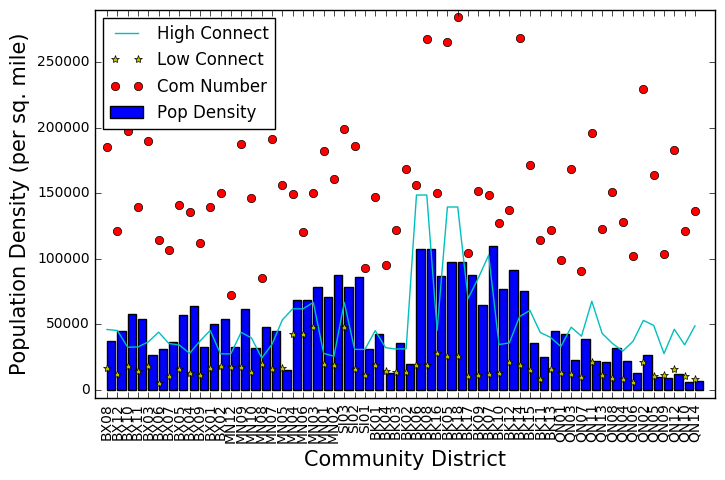

In [315]:
ax = plt.figure(figsize=(8,5))

Y = dfx['Population Density (per sq. mile)']
X = range(58)
labels = ['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN08',
       'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02', 'SI03',
       'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06', 'BK08',
       'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10', 'BK12',
       'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07', 'QN11',
       'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09', 'QN12',
       'QN10', 'QN14']

plt.plot(range(58), dfx['High Connections'], 'c-', label='High Connect')
plt.plot(range(58), dfx['Low connections'], 'y*', label='Low Connect')
plt.plot(range(58), dfx['Complaint Number'], 'ro', label='Com Number')
plt.bar(X,Y,label="Pop Density")
plt.xticks(X, labels, rotation=90, fontsize=10)

plt.ylabel('Population Density (per sq. mile)',fontsize=15)
plt.xlabel('Community District',fontsize=15)
plt.title('',fontsize=15)
plt.margins(0.02)
plt.legend(loc='best')

In [266]:
dfx.ix[dfx['Complaint Number'].idxmax()]

cd_id                                  MN05
Population Density (per sq. mile)     97254
Complaint Number                     284056
High Connections                     139552
Low connections                       25972
Name: 34, dtype: object

In [267]:
dfx.ix[dfx['Complaint Number'].idxmin()]

cd_id                                   BK13
Population Density (per sq. mile)    32537.4
Complaint Number                       72362
High Connections                       27559
Low connections                        17511
Name: 12, dtype: object

I'm just curious about the highest and lowest compliant numbers based on above figure, although the mean of each borough makes much sense than the extreme. Let's get the mean.

In [275]:
# http://chrisalbon.com/python/pandas_apply_operations_to_groups.html
cd_mean = dfx['Complaint Number'].groupby(dfx['cd_id'].str[:2])
cd_mean.mean()

cd_id
BK    142915
BX    147843
MN    187367
QN    140259
SI    146777
Name: Complaint Number, dtype: int64

In [276]:
# What do people in MANHATTAN mainly complaint about? 
# Types and amount of complaints are important clues...
# Also, we can check thier connection status, in terms of internet or mobile usage, to figure 
# out whether the high amount of complaints is related to thier access to the mobile frequency 

In [293]:
import statsmodels.api as sm

In [296]:
#OLS1
est_high = sm.OLS(dfx['Complaint Number'],dfx['High Connections']).fit()
est_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Complaint Number   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     270.8
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           2.57e-23
Time:                        18:25:17   Log-Likelihood:                -726.15
No. Observations:                  58   AIC:                             1454.
Df Residuals:                      57   BIC:                             1456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
High Connections     2.4664      0.150     16.456      0.000         2.166     2.767
==============================================================================
Omnibus:                       21.800   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.953
Skew:                          -1.265   Prob(JB):                     1.56e-08
Kurtosis:                       5.911   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
#OLS2
est_low = sm.OLS(dfx['Complaint Number'],dfx['Low connections']).fit()
est_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Complaint Number   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     223.8
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           2.15e-21
Time:                        18:25:56   Log-Likelihood:                -730.64
No. Observations:                  58   AIC:                             1463.
Df Residuals:                      57   BIC:                             1465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Low connections     7.3017      0.488     14.960      0.000         6.324     8.279
==============================================================================
Omnibus:                       33.250   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.538
Skew:                          -1.881   Prob(JB):                     2.16e-15
Kurtosis:                       6.714   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
#OLS3
est_pop = sm.OLS(dfx['Complaint Number'],dfx['Population Density (per sq. mile)']).fit()
est_pop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Complaint Number   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           1.38e-20
Time:                        18:29:49   Log-Likelihood:                -732.52
No. Observations:                  58   AIC:                             1467.
Df Residuals:                      57   BIC:                             1469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Population Density (per sq. mile)     2.4613      0.171     14.357      0.000         2.118     2.805
==============================================================================
Omnibus:                        0.624   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.753
Skew:                          -0.175   Prob(JB):                        0.686
Kurtosis:                       2.564   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparing among these 3 OLS (namely, com number vs. high connection, com number vs. low connection, and com number vs. pop density) results, we found the amount of compliants has a slightly stronger relationship with the high connections to mobile usage, rather than the other two.